In [14]:
#--- coding:utf-8 ---
import os,sys
# print os.system("which python")
print (sys.executable)


/home/sjiang/anaconda2/envs/CV3PY3/bin/python


In [1]:
#from mmdetection
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
 

import mmcv
from mmcv.runner import load_checkpoint
from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result

print ('getting start for model')
# cfg = mmcv.Config.fromfile('configs/myssd300_coco.py') 
cfg = mmcv.Config.fromfile('configs/mymask_rcnn_r101_fpn_1x.py') 
cfg.model.pretrained = None

# construct the model and load checkpoint
print("start load model..")
model = build_detector(cfg.model, test_cfg=cfg.test_cfg)
_ = load_checkpoint(model, 'work_dir/mymask_rcnn_r101_fpn_1/latest.pth')



getting start for model
start load model..


read image: 1.jpg
original image


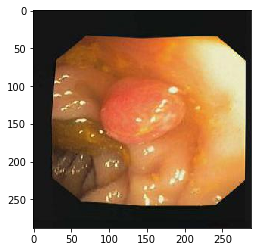

In [3]:

from matplotlib import pyplot as plt
%matplotlib inline
import os,sys
import cv2

# test a single image
print ('read image: 1.jpg')
img = mmcv.imread('data/Polyp_Aug/testimage/ori1/1.jpg')
result = inference_detector(model, img, cfg)

print ('original image' )  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()  




 

In [ ]:
# def vis_detections(im, class_name, dets, thresh=0.3):
#     """Visual debugging of detections."""
#     import matplotlib.pyplot as plt
#     im = im[:, :, (2, 1, 0)]
#     for i in xrange(np.minimum(10, dets.shape[0])):
#         bbox = dets[i, :4]
#         score = dets[i, -1]
#         if score > thresh:
#             plt.cla()
#             plt.imshow(im)
#             plt.gca().add_patch(
#                 plt.Rectangle((bbox[0], bbox[1]),
#                               bbox[2] - bbox[0],
#                               bbox[3] - bbox[1], fill=False,
#                               edgecolor='g', linewidth=3)
#                 )
#             plt.title('{}  {:.3f}'.format(class_name, score))
#             plt.show()
# img = cv2.imread('data/Polyp_Aug/testimage/ori1/1.jpg')
# vis_detections(img, 'Poly',)

In [ ]:
import cv2
import numpy as np
import matplotlib.image as mpimg

# test a single image
print ('read image: 1.jpg')
img = mmcv.imread('data/Polyp_Aug/testimage/ori1/1.jpg')
result = inference_detector(model, img, cfg)

print ('original image' )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
# plt.show()
displayBoxes('data/Polyp_Aug/testimage/ori1/1.jpg','data/Polyp_Aug/testimage/1.jpg')

print('result=', result)
print('result.shape=', result[0][0].shape)

# Directory of images to run detection on

# img = cv2.imread('data/Polyp_Aug/testimage/ori1/1.jpg')
# saveFile = "data/Polyp_Aug/testimage/1.jpg'"

def displayBoxes(imgFile, saveFile):
    img = cv2.imread(imgFile)
    result = inference_detector(model, img, cfg)
    scores = result[0][0][:, -1]
    ind = scores > 0.01
    bboxes = result[0][0][ind, :-1]
    for bbox in bboxes:
        bbox_int = bbox.astype(np.int32)

        plt.cla()
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.gca().add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='g', linewidth=3)
        )
        plt.title('{}  {:.3f}'.format('Poly', 0)) 
    print (saveFile.split('/')[-1]),
    plt.savefig(saveFile)

    cv2.destroyAllWindows()
    

ROOT_DIR = os.getcwd()
IMAGE_DIR = os.path.join(ROOT_DIR, "data/Polyp_Aug/testimage/ori1/")
SAVE_DIR = os.path.join(ROOT_DIR, "data/Polyp_Aug/testimage/withMask")
img_list = os.listdir(IMAGE_DIR)
for imgName in img_list: 
    img=os.path.join(IMAGE_DIR,imgName)
    saveFile = os.path.join(SAVE_DIR,imgName)
    displayBoxes(img, saveFile)

In [ ]:
# # https://github.com/multimodallearning/pytorch-mask-rcnn/blob/master/demo.py
# import os
# import sys
# import random
# import math
# import numpy as np
# import skimage.io
# import matplotlib
# import matplotlib.pyplot as plt

# from mrcnn.coco import CocoConfig
# from mrcnn import utils
# from mrcnn import model as modellib
# from mrcnn import visualize

# import torch


# # Root directory of the project
# ROOT_DIR = os.getcwd()

# # Directory to save logs and trained model
# MODEL_DIR = os.path.join(ROOT_DIR, "work_dir/mymask_rcnn_r101_fpn_1/")

# # Path to trained weights file
# # Download this file and place in the root of your
# # project (See README file for details)
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "latest.pth")

# # Directory of images to run detection on
# IMAGE_DIR = os.path.join(ROOT_DIR, "data/Polyp_Aug/testimage/ori1/")

# class InferenceConfig(CocoConfig):
#     # Set batch size to 1 since we'll be running inference on
#     # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
#     # GPU_COUNT = 0 for CPU
#     GPU_COUNT = 1
#     IMAGES_PER_GPU = 1

# config = InferenceConfig()
# config.display()

# # Create model object.
# model = modellib.MaskRCNN(model_dir=MODEL_DIR, config=config)
# if config.GPU_COUNT:
#     model = model.cuda()

# # Load weights trained on MS-COCO
# model.load_state_dict(torch.load(COCO_MODEL_PATH))

# # COCO Class names
# # Index of the class in the list is its ID. For example, to get ID of
# # the teddy bear class, use: class_names.index('teddy bear')
# class_names = ['Poly']

# # Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# # Run detection
# results = model.detect([image])

# # Visualize results
# r = results[0]
# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
#                             class_names, r['scores'])
# plt.show() 


In [4]:
# import time
# import mmcv
# import cv2 as cv
# import json
# import numpy as np
# import pycocotools.mask as maskutil
# from itertools import groupby
# from skimage import measure,draw

# def mainShow():
#     # testimagepath   = "XX.json"
#     # compressedRLECOCOlabelpath = "XX.pkl.json"
#     # imageprefix     = "XX/test-images/"
#     testimagepath   = "data/Polyp_Aug/testimage/annotations/coco_format_full_test.json"
#     compressedRLECOCOlabelpath = "data/Polyp_Aug/testimage/annotations/coco_format_full_test.json"
#     imageprefix     = "data/Polyp_Aug/testimage/ori1/"

#     startTime = time.time()
#     trthset = json.load(open(testimagepath, 'r'))
#     assert type(trthset) == dict, 'annotation file format {} not supported'.format(type(trthset))
#     prdcset = json.load(open(compressedRLECOCOlabelpath, 'r'))
#     assert type(prdcset) == dict, 'annotation file format {} not supported'.format(type(prdcset))
#     print('Done (t={:0.2f}s)'.format(time.time() - startTime))

#     ann_Y0 = trthset['annotations']
#     ann_Y1 = prdcset['annotations']

#     for image in trthset['images']:
#         imagepath = imageprefix+image['file_name']
#         img = cv.imread(imagepath)

#         src = np.zeros((966,1225,3), np.uint8)
#         src[:,:,:]=img[:,:,:]
#         dst = np.zeros((966,1225,3), np.uint8)
#         dst[:,:,:]=img[:,:,:]

#         masks = np.zeros((966,1225, 1), np.uint8)
#         masks.fill(0)
#         id0 = image['id']

#         counts = 0

#         for target in ann_Y0:
#             if target['image_id']==id0:
#                 counts += 1
#                 j=0
#                 X=[]
#                 Y=[]
#                 for seg in target['segmentation'][0]:
#                     if j == 0:
#                         x = float(seg)
#                         X.append(x)
#                     else:
#                         y = float(seg)
#                         Y.append(y)
#                     j = 1-j

#                 rr, cc = draw.polygon(Y, X)
#                 draw.set_color(src, [rr, cc], [0, 0, 255], 0.4)

#                 Point = np.zeros((len(Y), 2), dtype='int32')
#                 Point [:, 0] = X[:]
#                 Point [:, 1] = Y[:]
#                 print(Point)
#                 cv.fillPoly(masks, np.array([Point],'int32'), 1)
#         src[:, :, 0] = img[:, :, 0] #* 0.9 + masks[:, :, 0] * 0.1 * 255.0 / counts
#         src[:, :, 1] = img[:, :, 1] #* 0.9 + masks[:, :, 0] * 0.1 * 255.0 / counts
#         src[:, :, 2] = img[:, :, 2] * 0.2 + masks[:, :, 0] * 0.8 * 255.0 / counts

#         mmcv.imshow(src,"Y",1)

#         masks.fill(0)
#         counts = 0
#         for target in ann_Y1:
#             if target['image_id']==id0:
#                 counts += 1
#                 CRLE    = target['segmentation']
#                 print(CRLE)
#                 mask    = maskutil.decode(CRLE)
#                 mask    = np.reshape(mask, (img.shape[1], img.shape[0], 1))
#                 masks[:, :] = masks[:, :] + mask[:, :]

#         dst[:, :, 0] = img[:, :, 0] * 0.2 + masks[:, :, 0] * 0.8 * 255.0/counts
#         dst[:, :, 1] = img[:, :, 1] #* 0.5 + masks[:, :, 0] * 0.5 * 255.0/counts
#         dst[:, :, 2] = src[:, :, 2] * 0.9 + masks[:, :, 0] * 0.1 * 255.0/counts
#         mmcv.imshow(dst,"Y'")

#     return 0
# mainShow()



In [ ]:
#encoding:utf-8
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.models import build_detector
from mmdet.apis import inference_detector, show_result
import numpy as np, pycocotools.mask as maskUtils, mmcv
from mmdet.core import tensor2imgs, get_classes
from glob import glob
import os
config_path = 'configs/mymask_rcnn_r101_fpn_1x.py'
model_path = 'work_dir/mymask_rcnn_r101_fpn_1/latest.pth'
img_list = glob('data/Polyp_Aug/testimage/ori1/1.jpg')
img_save= 'data/Polyp_Aug/testimage/1.jpg'
cfg = mmcv.Config.fromfile(config_path)
cfg.model.pretrained = None

img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)

def show_mask_result(img,
                    result,
                    dataset='coco',
                    score_thr=0.7,
                    with_mask=True):
        segm_result=None
        if with_mask:
            bbox_result, segm_result = result
        else:
            bbox_result=result
        if isinstance(dataset, str):#  add own data label to mmdet.core.class_name.py
            class_names = get_classes(dataset)
            # print(class_names)
        elif isinstance(dataset, list):
            class_names = dataset
        else:
            raise TypeError('dataset must be a valid dataset name or a list'
                            ' of class names, not {}'.format(type(dataset)))
        h, w, _ = img.shape
        img_show = img[:h, :w, :]
        labels = [
            np.full(bbox.shape[0], i, dtype=np.int32)
            for i, bbox in enumerate(bbox_result)
        ]
        labels = np.concatenate(labels)
        bboxes = np.vstack(bbox_result)
        if with_mask:
            segms = mmcv.concat_list(segm_result)
            inds = np.where(bboxes[:, -1] > score_thr)[0]
            for i in inds:
                color_mask = np.random.randint(0, 256, (1, 3), dtype=np.uint8)
                mask = maskUtils.decode(segms[i]).astype(np.bool)
                img_show[mask] = img_show[mask] * 0.5 + color_mask * 0.5
        result_img=mmcv.imshow_det_bboxes(
            img_show,
            bboxes,
            labels,
            class_names=class_names,
            score_thr=score_thr)
        return  result_img

# construct the model and load checkpoint
model = build_detector(cfg.model, test_cfg=cfg.test_cfg)
_ = load_checkpoint(model, model_path)
for img in img_list:
    img_name=os.path.basename(img)
    new_path=os.path.join(img_save,img_name)
    result=inference_detector(model, img, cfg, device='cuda:0')
    answer=show_mask_result(mmcv.imread(img), result,score_thr=0.6,with_mask=True)
    mmcv.imwrite(answer,new_path)